#### Import Package

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### Create & Process Data

In [2]:
#Dictionary 1,2,3:
PialaEropa = {"Negara" : ["jerman", "spanyol", "uni soviet", "italia", "prancis"], 
              "piala": [3, 3, 1, 1, 2] }
PialaAsia = {"Negara" : ["jepang", "indonesia", "korea selatan", "irak", "saudi arabia"], 
             "piala" : [4, 0, 2, 1, 3]}
PialaDunia = {"Negara" : ["jerman", "spanyol", "korea selatan", "jepang", "prancis"],
             "piala" : [4, 1, 0, 0, 3]}

#Membuat DataFrame dari Dictionary 1,2,3:
dfPialaEropa= pd.DataFrame.from_dict(PialaEropa)
dfPialaAsia= pd.DataFrame.from_dict(PialaAsia)
dfPialaDunia= pd.DataFrame.from_dict(PialaDunia)

In [3]:
dfPialaEropa

,Negara,piala
0,jerman,3
1,spanyol,3
2,uni soviet,1
3,italia,1
4,prancis,2


In [4]:
dfPialaAsia

,Negara,piala
0,jepang,4
1,indonesia,0
2,korea selatan,2
3,irak,1
4,saudi arabia,3


In [5]:
dfPialaDunia

,Negara,piala
0,jerman,4
1,spanyol,1
2,korea selatan,0
3,jepang,0
4,prancis,3


In [6]:
#Menggabungkan DataFrame dengan Variabel Pemenang
Pemenang = pd.concat([dfPialaEropa, dfPialaAsia, dfPialaDunia]).reset_index()
Pemenang

,index,Negara,piala
0,0,jerman,3
1,1,spanyol,3
2,2,uni soviet,1
3,3,italia,1
4,4,prancis,2
5,0,jepang,4
6,1,indonesia,0
7,2,korea selatan,2
8,3,irak,1
9,4,saudi arabia,3


In [7]:
#Menampilkan Total Piala 
Total_Piala = Pemenang.groupby(['Negara']).sum()[['piala']]
Total_Piala.reset_index()

,Negara,piala
0,indonesia,0
1,irak,1
2,italia,1
3,jepang,4
4,jerman,7
5,korea selatan,2
6,prancis,5
7,saudi arabia,3
8,spanyol,4
9,uni soviet,1


In [11]:
#Mengurutkan Pemilik Piala Terbanyak
Total_Piala = Total_Piala.sort_values(by='piala', ascending = False).reset_index()
Total_Piala

,index,Negara,piala
0,0,jerman,7
1,1,prancis,5
2,2,jepang,4
3,3,spanyol,4
4,4,saudi arabia,3
5,5,korea selatan,2
6,6,irak,1
7,7,italia,1
8,8,uni soviet,1
9,9,indonesia,0


In [12]:
JuaraBertahan = Total_Piala.iloc[[0,3,5]].reset_index()
JuaraBertahan

,level_0,index,Negara,piala
0,0,0,jerman,7
1,3,3,spanyol,4
2,5,5,korea selatan,2


#### Data Preprocessing Using Dummy Data

In [14]:
#Load Dataset
dfCreditScore = pd.read_csv(r"E:\MINE\beasiswa\2022\DATA BANGLORE\ON BOARDING\EXAM + TASK\3 - DATA PREPROCESSING\DATA TASK\credit_score.csv", sep = ',')
dfCreditScore

,umur,pendapatan,family_member,debt,is_credit,credit_score
0,60.854010,1.688747e+07,0.0,1.234051e+07,0.0,514.435008
1,65.603151,1.814031e+07,8.0,2.148741e+07,0.0,507.763234
2,27.203123,1.173253e+07,3.0,3.114519e+07,0.0,454.941676
3,34.861070,1.198259e+07,1.0,3.091853e+06,0.0,437.284466
4,51.776474,1.231265e+07,5.0,3.054250e+07,0.0,470.543029
...,...,...,...,...,...,...
13077,50.131497,1.053330e+07,1.0,1.750930e+07,0.0,470.452534
13078,56.835766,1.284579e+07,1.0,2.408513e+07,0.0,498.080274
13079,52.344909,1.430617e+07,0.0,2.958113e+07,0.0,503.637435
13080,47.782509,1.235632e+07,6.0,4.849752e+07,0.0,478.337996


In [15]:
#Cek tipe data & Nama Kolom pada data dfCreditScore
dfCreditScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13082 entries, 0 to 13081
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           12941 non-null  float64
 1   pendapatan     12893 non-null  float64
 2   family_member  12915 non-null  float64
 3   debt           12887 non-null  float64
 4   is_credit      12919 non-null  float64
 5   credit_score   12920 non-null  float64
dtypes: float64(6)
memory usage: 613.3 KB


In [16]:
#cek missing data dfCreditScore
dfCreditScore.isnull().sum()

umur             141
pendapatan       189
family_member    167
debt             195
is_credit        163
credit_score     162
dtype: int64

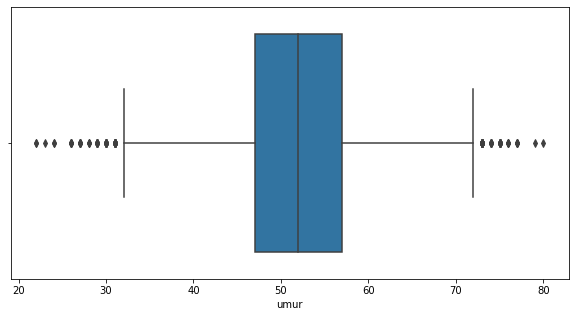

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plot1 = sns.boxplot(dfCreditScore['umur'])

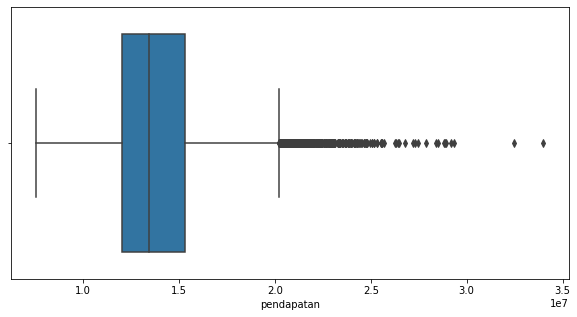

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plot1 = sns.boxplot(dfCreditScore['pendapatan'])

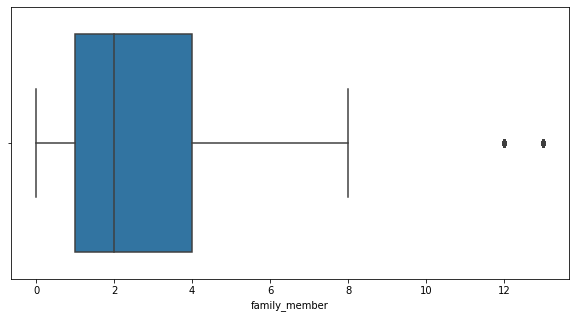

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plot1 = sns.boxplot(dfCreditScore['family_member'])

In [17]:
#cek deskripsi data dfCreditScore
dfCreditScore.describe()

,umur,pendapatan,family_member,debt,is_credit,credit_score
count,12941.000000,1.289300e+04,12915.000000,1.288700e+04,12919.000000,12920.000000
mean,52.643255,1.388759e+07,2.528378,3.831354e+07,0.157907,491.005186
std,7.913492,2.742709e+06,2.843177,2.285632e+07,0.364668,50.473637
min,22.000000,7.540000e+06,0.000000,1.000000e+06,0.000000,300.000000
25%,47.345705,1.197522e+07,1.000000,2.233565e+07,0.000000,462.060752
50%,52.699454,1.344787e+07,2.000000,3.325222e+07,0.000000,488.390956
75%,58.004179,1.532839e+07,4.000000,4.884514e+07,0.000000,518.246356
max,80.000000,3.400000e+07,13.000000,2.340000e+08,1.000000,850.000000


In [18]:
#Handle missing data dfCreditScore
#Menggunakan median karena bersifat 'robust'
dfCreditScore['umur']=dfCreditScore['umur'].fillna(dfCreditScore['umur'].median())
dfCreditScore['pendapatan']=dfCreditScore['pendapatan'].fillna(dfCreditScore['pendapatan'].median())
dfCreditScore['family_member']=dfCreditScore['family_member'].fillna(dfCreditScore['family_member'].median())
dfCreditScore.isnull().sum()

umur               0
pendapatan         0
family_member      0
debt             195
is_credit        163
credit_score     162
dtype: int64

In [19]:
#Mengubah tipe data umur, family_member, pendapatan data dfCreditScore
dfCreditScore['umur'] = dfCreditScore['umur'].astype(int)
dfCreditScore['family_member'] = dfCreditScore['family_member'].astype(int)
dfCreditScore['pendapatan'] = dfCreditScore['pendapatan'].astype(int)
dfCreditScore

,umur,pendapatan,family_member,debt,is_credit,credit_score
0,60,16887465,0,1.234051e+07,0.0,514.435008
1,65,18140313,8,2.148741e+07,0.0,507.763234
2,27,11732526,3,3.114519e+07,0.0,454.941676
3,34,11982587,1,3.091853e+06,0.0,437.284466
4,51,12312654,5,3.054250e+07,0.0,470.543029
...,...,...,...,...,...,...
13077,50,10533295,1,1.750930e+07,0.0,470.452534
13078,56,12845793,1,2.408513e+07,0.0,498.080274
13079,52,14306172,0,2.958113e+07,0.0,503.637435
13080,47,12356315,6,4.849752e+07,0.0,478.337996


In [20]:
#Membuat kondisi pelanggan yang mendapat credit
Acc_Credit = dfCreditScore[~((dfCreditScore['umur'] > 40) & (dfCreditScore['family_member'] >= 3) & (dfCreditScore['pendapatan'] < 15000000))]
Acc_Credit

,umur,pendapatan,family_member,debt,is_credit,credit_score
0,60,16887465,0,1.234051e+07,0.0,514.435008
1,65,18140313,8,2.148741e+07,0.0,507.763234
2,27,11732526,3,3.114519e+07,0.0,454.941676
3,34,11982587,1,3.091853e+06,0.0,437.284466
5,58,14380365,0,2.506403e+07,0.0,497.689723
...,...,...,...,...,...,...
13073,47,11412779,0,1.199996e+07,0.0,458.487993
13076,63,14627549,0,2.826608e+07,0.0,512.742323
13077,50,10533295,1,1.750930e+07,0.0,470.452534
13078,56,12845793,1,2.408513e+07,0.0,498.080274


In [21]:
#Membuat kondisi pelanggan yang tidak mendapat credit
Deny_PinjamanCS = dfCreditScore[((dfCreditScore['umur'] > 40) & (dfCreditScore['family_member'] >= 3) & (dfCreditScore['pendapatan'] < 15000000))]
Deny_PinjamanCS

,umur,pendapatan,family_member,debt,is_credit,credit_score
4,51,12312654,5,3.054250e+07,0.0,470.543029
9,52,13008346,6,2.324459e+07,0.0,451.666608
25,59,12610213,8,3.559241e+07,1.0,388.288655
29,50,11017353,7,2.755120e+07,0.0,439.848123
32,49,10411430,3,4.791841e+07,0.0,486.677455
...,...,...,...,...,...,...
13070,45,13194456,4,5.744930e+07,0.0,497.888017
13074,47,12302117,4,4.429768e+07,1.0,396.391727
13075,46,14017970,5,2.664329e+07,1.0,373.082124
13080,47,12356315,6,4.849752e+07,0.0,478.337996


In [22]:
#Cek kebenaran data berdasarkan jumlah data yang ditolak creditnya dan data yang diterima creditnya
cekDataCS = pd.concat([Deny_PinjamanCS,Acc_Credit]).reset_index()
cekDataCS

,index,umur,pendapatan,family_member,debt,is_credit,credit_score
0,4,51,12312654,5,3.054250e+07,0.0,470.543029
1,9,52,13008346,6,2.324459e+07,0.0,451.666608
2,25,59,12610213,8,3.559241e+07,1.0,388.288655
3,29,50,11017353,7,2.755120e+07,0.0,439.848123
4,32,49,10411430,3,4.791841e+07,0.0,486.677455
...,...,...,...,...,...,...,...
13077,13073,47,11412779,0,1.199996e+07,0.0,458.487993
13078,13076,63,14627549,0,2.826608e+07,0.0,512.742323
13079,13077,50,10533295,1,1.750930e+07,0.0,470.452534
13080,13078,56,12845793,1,2.408513e+07,0.0,498.080274


In [23]:
#Cek dekripsi data pelanggan yang mendapat credit
Acc_Credit.describe()

,umur,pendapatan,family_member,debt,is_credit,credit_score
count,10199.000000,1.019900e+04,10199.000000,1.005000e+04,10065.000000,10063.000000
mean,52.695166,1.423038e+07,1.636239,3.832340e+07,0.154496,499.596030
std,8.413649,2.905905e+06,2.156380,2.284538e+07,0.361441,49.073392
min,22.000000,7.540000e+06,0.000000,1.000000e+06,0.000000,345.856695
25%,47.000000,1.213576e+07,0.000000,2.223035e+07,0.000000,471.275404
50%,53.000000,1.379009e+07,1.000000,3.330365e+07,0.000000,496.179995
75%,59.000000,1.592604e+07,2.000000,4.888313e+07,0.000000,525.878105
max,80.000000,3.400000e+07,13.000000,2.340000e+08,1.000000,850.000000


In [26]:
#Load Dataset 2
df_Cbanking = pd.read_csv(r"E:\MINE\beasiswa\2022\DATA BANGLORE\ON BOARDING\EXAM + TASK\3 - DATA PREPROCESSING\DATA TASK\banking.csv")
df_Cbanking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [27]:
#Cek tipe data dan nama kolom data banking
df_Cbanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [28]:
#Cek deskripsi data df_Cbanking
df_Cbanking.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [29]:
#Cek kategori pada kolom marital
df_Cbanking['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [30]:
#Cek kategori pada kolom housing
df_Cbanking['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [31]:
#Filter data banking berdasarkan kondisi
DenyPinjaman = df_Cbanking[(df_Cbanking['marital'] != 'married') & (df_Cbanking['housing'] == 'no')]
DenyPinjaman

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
10,34,housemaid,single,university.degree,no,no,no,telephone,may,fri,62,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
17,27,admin.,single,university.degree,no,no,no,telephone,oct,tue,540,1,999,0,nonexistent,-0.1,93.798,-40.4,4.860,5195.8,1
21,35,blue-collar,single,unknown,no,no,yes,telephone,jun,fri,1114,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
23,32,technician,single,professional.course,no,no,no,cellular,jul,thu,35,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
29,38,blue-collar,single,basic.4y,unknown,no,no,telephone,jul,tue,41,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41154,31,technician,divorced,high.school,no,no,no,cellular,aug,fri,101,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
41156,44,technician,divorced,professional.course,no,no,no,telephone,jun,thu,112,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0
41159,47,admin.,divorced,high.school,unknown,no,no,cellular,jul,mon,129,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
41167,30,admin.,single,high.school,no,no,no,cellular,jul,wed,251,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


In [32]:
#Filter data banking berdasarkan parameter analisis
Deny_Pinjaman = DenyPinjaman[['age','duration','marital','housing']]
Deny_Pinjaman

,age,duration,marital,housing
10,34,62,single,no
17,27,540,single,no
21,35,1114,single,no
23,32,35,single,no
29,38,41,single,no
...,...,...,...,...
41154,31,101,divorced,no
41156,44,112,divorced,no
41159,47,129,divorced,no
41167,30,251,single,no


In [33]:
#Hitung rata-rata umur
Deny_Pinjaman['age'].mean()

36.646757915111294

In [34]:
#Mengolah data durasi agar mudah dipahami
Deny_Pinjaman['duration_inYear'] = Deny_Pinjaman['duration'] / 365
Deny_Pinjaman

,age,duration,marital,housing,duration_inYear
10,34,62,single,no,0.169863
17,27,540,single,no,1.479452
21,35,1114,single,no,3.052055
23,32,35,single,no,0.095890
29,38,41,single,no,0.112329
...,...,...,...,...,...
41154,31,101,divorced,no,0.276712
41156,44,112,divorced,no,0.306849
41159,47,129,divorced,no,0.353425
41167,30,251,single,no,0.687671


In [35]:
#Sorting data pinjaman berdasarkan lama durasi
Deny_Pinjaman.sort_values("duration", ascending = False)

,age,duration,marital,housing,duration_inYear
32880,27,3785,single,no,10.369863
37790,35,2680,single,no,7.342466
35742,26,2635,single,no,7.219178
24883,53,2486,divorced,no,6.810959
11155,33,2420,single,no,6.630137
...,...,...,...,...,...
39614,30,5,single,no,0.013699
27404,27,5,single,no,0.013699
39692,25,5,single,no,0.013699
3738,26,4,single,no,0.010959


In [36]:
Deny_Pinjaman.describe()

,age,duration,duration_inYear
count,7233.000000,7233.000000,7233.000000
mean,36.646758,261.425411,0.716234
std,9.950239,257.478976,0.705422
min,17.000000,3.000000,0.008219
25%,30.000000,104.000000,0.284932
50%,34.000000,184.000000,0.504110
75%,42.000000,327.000000,0.895890
max,95.000000,3785.000000,10.369863


Hasil Analisis:
1. Pelanggan yang ditolak pinjamannya rata-rata berumur 37 tahun 
2. Durasi pinjaman terlama yakni 3785 hari atau 10 tahun
3. Berdasarkan data  yang telah difilter, rata-rata peminjam yang ditolak berumur 37 tahun dengan rata-rata durasi pinjaman
   selama 261 hari atau hampir dari satu tahun. 